In [9]:
import numpy as np
import pandas as pd

from hulearn.datasets import load_titanic
from sklearn.model_selection import GridSearchCV
from hulearn.classification import FunctionClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer

In [3]:
df = load_titanic(as_frame = True)
X, y = df.drop(columns=['survived']),df['survived']

In [6]:
def fare_based(dataf, threshold=10):
    return np.array(dataf['fare']> threshold).astype(int)

In [ ]:
mod = FunctionClassifier(fare_based, threshold=10)

In [11]:
grid = GridSearchCV( mod,
cv = 2,
param_grid = {'threshold': np.linspace(0,100,30)},
scoring = {'accuracy': make_scorer(accuracy_score),
'precision': make_scorer(precision_score),
'recall' : make_scorer(recall_score)},
refit = 'accuracy'
)
grid.fit(X,y)

GridSearchCV(cv=2,
             estimator=FunctionClassifier(func=<function fare_based at 0x0000026262A5A430>,
                                          threshold=10),
             param_grid={'threshold': array([  0.        ,   3.44827586,   6.89655172,  10.34482759,
        13.79310345,  17.24137931,  20.68965517,  24.13793103,
        27.5862069 ,  31.03448276,  34.48275862,  37.93103448,
        41.37931034,  44.82758621,  48.27586207,  51.72413793,
        55.17241379,  58.62068966,  62.06896552,  65.51724138,
        68.96551724,  72.4137931 ,  75.86206897,  79.31034483,
        82.75862069,  86.20689655,  89.65517241,  93.10344828,
        96.55172414, 100.        ])},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

<AxesSubplot: xlabel='param_threshold'>

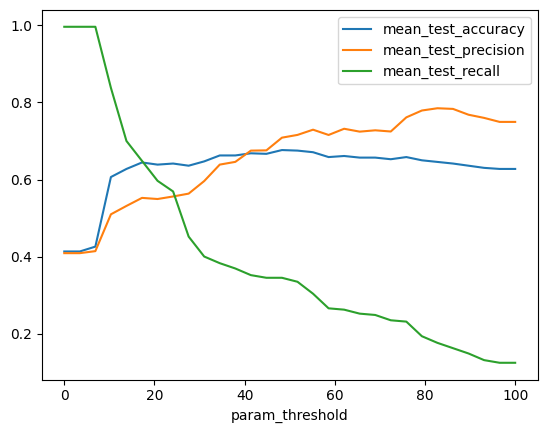

In [12]:
score_df = (pd.DataFrame(grid.cv_results_)
.set_index('param_threshold')
[['mean_test_accuracy', 'mean_test_precision','mean_test_recall']])

score_df.plot()